In [1]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd
import numpy as np
import string
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Athira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Athira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Athira\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Load the data
df = pd.read_csv(r"C:\Users\Athira\Downloads\archive (2).zip")

In [3]:
df.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [4]:
train_file = pd.DataFrame(df)
test_file = pd.DataFrame(df)

train_x = train_file['title']
test_x = test_file['title']
train_y = train_file['label']
test_y = test_file['label']

In [5]:
train_file['num_characters'] = train_file['label'].apply(len)

In [6]:
train_file['num_words'] = train_file['title'].apply(lambda x:len(nltk.word_tokenize(x)))

In [7]:
train_x

0                            You Can Smell Hillary’s Fear
1       Watch The Exact Moment Paul Ryan Committed Pol...
2             Kerry to go to Paris in gesture of sympathy
3       Bernie supporters on Twitter erupt in anger ag...
4        The Battle of New York: Why This Primary Matters
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, Length: 6335, dtype: object

In [8]:
Fake = train_file.text[train_file.label[train_file.label ==  'FAKE'].index]

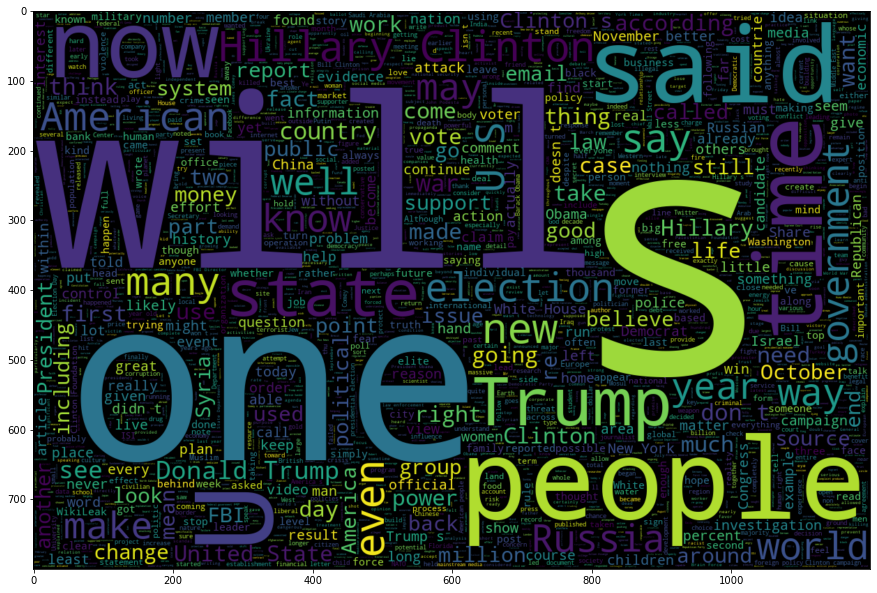

In [9]:
plt.figure(figsize = (15,20)) 
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(Fake))
plt.imshow(wordcloud,interpolation = 'bilinear')

In [10]:
Real = train_file.text[train_file.label[train_file.label ==  'REAL'].index]

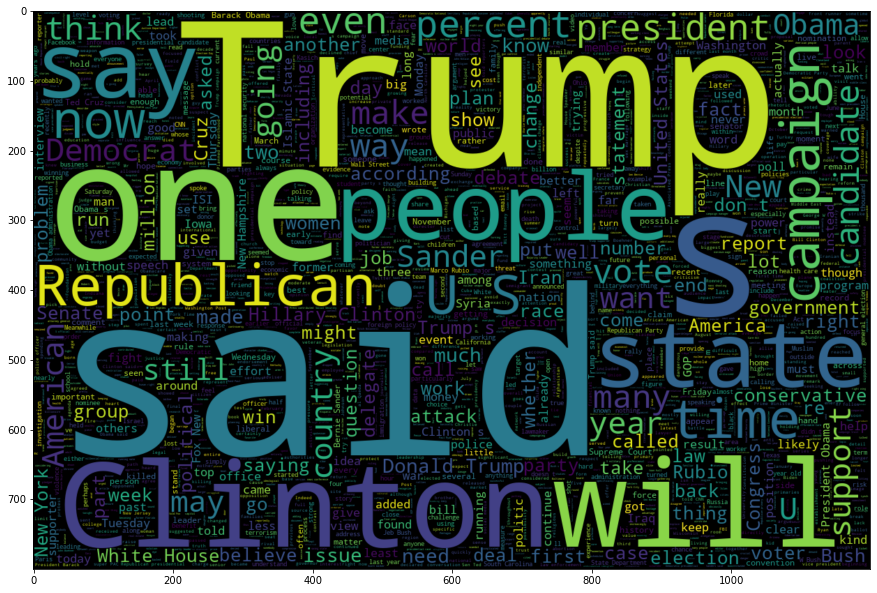

In [11]:
plt.figure(figsize = (15,20)) 
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(Real))
plt.imshow(wordcloud,interpolation = 'bilinear')

label
FAKE    3164
REAL    3171
Name: title, dtype: int64


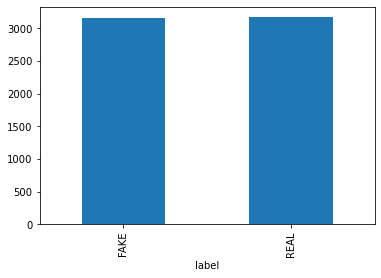

In [12]:
# How many fake and real articles?
print(train_file.groupby(['label'])['title'].count())
train_file.groupby(['label'])['title'].count().plot(kind="bar")
plt.show()


In [13]:
def tokenization(text):
    lst = text.split()
    return lst
train_x = train_x.apply(tokenization)
test_x = test_x.apply(tokenization)

In [14]:
def lowercasing(lst):
    new_lst = []
    for  i in  lst:
        i = i.lower()
        new_lst.append(i) 
    return new_lst
train_x = train_x.apply(lowercasing)
test_x = test_x.apply(lowercasing)
train_x

0                      [you, can, smell, hillary’s, fear]
1       [watch, the, exact, moment, paul, ryan, commit...
2       [kerry, to, go, to, paris, in, gesture, of, sy...
3       [bernie, supporters, on, twitter, erupt, in, a...
4       [the, battle, of, new, york:, why, this, prima...
                              ...                        
6330    [state, department, says, it, can't, find, ema...
6331    [the, ‘p’, in, pbs, should, stand, for, ‘pluto...
6332    [anti-trump, protesters, are, tools, of, the, ...
6333    [in, ethiopia,, obama, seeks, progress, on, pe...
6334    [jeb, bush, is, suddenly, attacking, trump., h...
Name: title, Length: 6335, dtype: object

In [15]:
def remove_punctuations(lst):
    new_lst = []
    for i in lst:
        for  j in  string.punctuation:
            i = i.replace(j,'')
        new_lst.append(i)
    return new_lst
train_x = train_x.apply(remove_punctuations) 
test_x = test_x.apply(remove_punctuations)
train_x

0                      [you, can, smell, hillary’s, fear]
1       [watch, the, exact, moment, paul, ryan, commit...
2       [kerry, to, go, to, paris, in, gesture, of, sy...
3       [bernie, supporters, on, twitter, erupt, in, a...
4       [the, battle, of, new, york, why, this, primar...
                              ...                        
6330    [state, department, says, it, cant, find, emai...
6331    [the, ‘p’, in, pbs, should, stand, for, ‘pluto...
6332    [antitrump, protesters, are, tools, of, the, o...
6333    [in, ethiopia, obama, seeks, progress, on, pea...
6334    [jeb, bush, is, suddenly, attacking, trump, he...
Name: title, Length: 6335, dtype: object

In [16]:
def remove_numbers(lst):
    nodig_lst = []
    new_lst = []

    for i in  lst:
        for j in  string.digits:
            i = i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst
train_x = train_x.apply(remove_numbers)
test_x = test_x.apply(remove_numbers)
train_x

0                      [you, can, smell, hillary’s, fear]
1       [watch, the, exact, moment, paul, ryan, commit...
2       [kerry, to, go, to, paris, in, gesture, of, sy...
3       [bernie, supporters, on, twitter, erupt, in, a...
4       [the, battle, of, new, york, why, this, primar...
                              ...                        
6330    [state, department, says, it, cant, find, emai...
6331    [the, ‘p’, in, pbs, should, stand, for, ‘pluto...
6332    [antitrump, protesters, are, tools, of, the, o...
6333    [in, ethiopia, obama, seeks, progress, on, pea...
6334    [jeb, bush, is, suddenly, attacking, trump, he...
Name: title, Length: 6335, dtype: object

In [17]:
def remove_numbers(lst):
    nodig_lst = []
    new_lst = []

    for i in  lst:
        for j in  string.digits:
            i = i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst
train_x = train_x.apply(remove_numbers)
test_x = test_x.apply(remove_numbers)
train_x

0                      [you, can, smell, hillary’s, fear]
1       [watch, the, exact, moment, paul, ryan, commit...
2       [kerry, to, go, to, paris, in, gesture, of, sy...
3       [bernie, supporters, on, twitter, erupt, in, a...
4       [the, battle, of, new, york, why, this, primar...
                              ...                        
6330    [state, department, says, it, cant, find, emai...
6331    [the, ‘p’, in, pbs, should, stand, for, ‘pluto...
6332    [antitrump, protesters, are, tools, of, the, o...
6333    [in, ethiopia, obama, seeks, progress, on, pea...
6334    [jeb, bush, is, suddenly, attacking, trump, he...
Name: title, Length: 6335, dtype: object

In [18]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst = []
    for i in lst:
        i = lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
train_x = train_x.apply(lemmatzation)
test_x = test_x.apply(lemmatzation)
train_x

0                      [you, can, smell, hillary’s, fear]
1       [watch, the, exact, moment, paul, ryan, commit...
2       [kerry, to, go, to, paris, in, gesture, of, sy...
3       [bernie, supporter, on, twitter, erupt, in, an...
4       [the, battle, of, new, york, why, this, primar...
                              ...                        
6330    [state, department, say, it, cant, find, email...
6331    [the, ‘p’, in, pb, should, stand, for, ‘plutoc...
6332    [antitrump, protester, are, tool, of, the, oli...
6333    [in, ethiopia, obama, seek, progress, on, peac...
6334    [jeb, bush, is, suddenly, attacking, trump, he...
Name: title, Length: 6335, dtype: object

In [19]:
train_x = train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x = test_x.apply(lambda x: ''.join(i+' '  for i in x))
train_x

0                           you can smell hillary’s fear 
1       watch the exact moment paul ryan committed pol...
2            kerry to go to paris in gesture of sympathy 
3       bernie supporter on twitter erupt in anger aga...
4         the battle of new york why this primary matter 
                              ...                        
6330    state department say it cant find email from c...
6331    the ‘p’ in pb should stand for ‘plutocratic’ o...
6332    antitrump protester are tool of the oligarchy ...
6333    in ethiopia obama seek progress on peace secur...
6334    jeb bush is suddenly attacking trump here why ...
Name: title, Length: 6335, dtype: object

In [20]:
from sklearn.feature_extraction.text  import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000,min_df=4)
train_1 = tfidf.fit_transform(train_x)

train_arr = train_1.toarray()

In [21]:
train_file

Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  num_characters  \
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE               4   
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE               4   
2     U.S. Secretary of State John F. Kerry said Mon...  REAL               4   
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE               4   
4     It's primary day in New York and front-runners...  REAL               4   
...                                                 ...   ...             ...   
6330  The State Department told the Republican Natio...  REAL               4   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE               4   
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE               4   
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL               4   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL               4   

      num_words  
0             7  
1            16  
2             9  
3            18  
4            10  
...         ...  
6330         12  
6331         16  
6332          9  
6333         13  
6334         12  

[6335 rows x 6 columns]

# MultinomialNB

In [22]:
from sklearn.naive_bayes import MultinomialNB
NB_MN = MultinomialNB()
NB_MN.fit(train_arr,train_y)
test_arr = tfidf.fit_transform(test_x).toarray()
pred = NB_MN.predict(test_arr)

df = pd.DataFrame(test_file['title'].tolist(),columns = ['Text'])
df['Predictions'] = pred
df.style

In [23]:
def eval_model(y,y_pred):
    print("F1 score of the model")
    print(f1_score(y,y_pred,average='micro'))
    print("Accuracy of the model")
    print(accuracy_score(y,y_pred))
    print("Accuracy of the model in percentage")
    print(round(accuracy_score(y,y_pred)*100,3),"%")

In [24]:
from sklearn.metrics import  confusion_matrix
def confusion_mat(color):
    cof=confusion_matrix(test_y, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['Work life balance ','Team connect','Learning and development ','Culture '],yticklabels=['Work life balance ','Team connect','Learning and development ','Culture ']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");
    

In [25]:
from sklearn.metrics  import f1_score,accuracy_score
eval_model(test_y,pred)
    
a = round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.8784530386740331
Accuracy of the model
0.8784530386740331
Accuracy of the model in percentage
87.845 %


# DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(train_arr,train_y)
pred = DT.predict(test_arr)

df = pd.DataFrame(test_file['title'].tolist(),columns = ['Text'])
df['Predictions'] = pred
df.style

In [27]:
eval_model(test_y,pred)
    
b = round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.9998421468034727
Accuracy of the model
0.9998421468034727
Accuracy of the model in percentage
99.984 %


# Gaussian Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(train_arr,train_y)
pred = NB.predict(test_arr)

df = pd.DataFrame(test_file['title'].tolist(),columns = ['Text'])
df['Predictions'] = pred
df.style

In [29]:
eval_model(test_y,pred)
    
c = round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.8094711917916337
Accuracy of the model
0.8094711917916337
Accuracy of the model in percentage
80.947 %


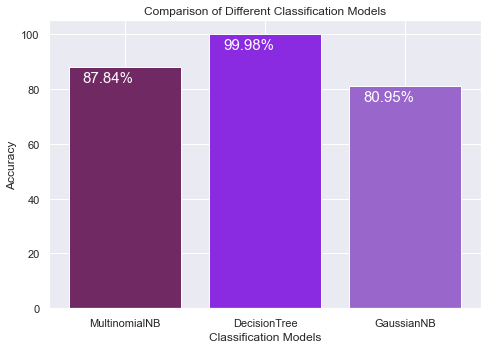

In [30]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['MultinomialNB', 'DecisionTree', 'GaussianNB']
Accuracy=[a,b,c]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2','#9966cc','#df73ff','#702763']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');

plt.show();